# Clean and Analyze Employee Exit Surveys


   We are working with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the DETE exit survey data here (https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)

Stakeholders want to know the following:
    
    - Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

    - Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

They want us to combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers. We will have to do data cleaning in order to compare the two different surveys.

In [1]:
# set up DA environment
import pandas as pd
import numpy as np

In [2]:
dete_survey = pd.read_csv('dete_survey.csv')
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [3]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
tafe_survey = pd.read_csv('tafe_survey.csv')
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [5]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [6]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

In [7]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [8]:
dete_survey['Role Start Date'].value_counts()

Not Stated    98
2012          65
2011          57
2010          46
2008          45
2007          41
2013          41
2009          38
2006          25
2004          22
2003          20
2005          20
2000          20
1999          19
1996          19
1989          18
1992          17
2002          16
2001          15
1998          15
1988          14
1995          13
1997          13
1975          12
1990          12
1986          11
1978           9
1993           9
1976           9
1991           8
1979           7
1994           7
1985           6
1981           5
1987           5
1983           5
1982           4
1984           4
1980           3
1977           2
1970           2
1974           1
1972           1
1971           1
200            1
1973           1
Name: Role Start Date, dtype: int64

Observations: 

Dete survey has 56 columns, 6 of which have null values in a great majority of their rows.
Tafe survey has no columns with more than %15 of the rows being null.

Dete has many boolean answers while Tafe does not. Both contain mostly objects.

'Role Start Date' in dete survey has 98 'Not Stated' values, these should be equivalent to null values though they are not identified as such.

Both datasets have common information in columns with different names.


## 2. Identify Missing Values and Drop Unnecessary Columns

In [9]:
#Turn null equivalent value in to null
dete_survey=pd.read_csv("dete_survey.csv",na_values="Not Stated")

dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [10]:
#drop unnecessary columns
dete_survey_updated = dete_survey.drop(columns=dete_survey.columns[28:49], axis=1)
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [11]:
tafe_survey_updated = tafe_survey.drop(columns=tafe_survey.columns[17:66], axis=1)
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

By dropping all the columns above, we have updated datasets which only have the information we are interested in to make our analysis. 

## Adjust Column Names

In [12]:
# Rename dete_survey columns
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')
# Check all names
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


In [13]:
# Rename tafe_survey columns
mapping = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 
          'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position', 
          'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis=1)
# Check all names
print(tafe_survey_updated.columns)

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')


In [14]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [15]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


There we standardized the names of the columns. Now, they are congruent between surveys so we can combine them.

## 4. Filter the Data

Next, let's remove more of the data we don't need. Focusing on the unique values in the separationtype columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we are only interested in survey respondents who resigned, so their separation type contains the string 'Resignation'.

In [16]:
# Values in dete_survey
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [17]:
# Values in tafe_survey
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [18]:
# Select only Resignation separationtype
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]
# Check unique values
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [19]:
# Select Resignation separationtype for each dataframe
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype']=='Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation'].copy()

## 5. Verify the Data

In this step, we'll focus on verifying that the years in the cease_date and dete_start_date columns make sense. However, we encourage you to check the data for other issues as well!

 - Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
 - Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

In [20]:
dete_resignations['cease_date'].value_counts

<bound method IndexOpsMixin.value_counts of 3      05/2012
5      05/2012
8      07/2012
9         2012
11        2012
        ...   
808    12/2013
815    01/2014
816    01/2014
819    01/2014
821    12/2013
Name: cease_date, Length: 311, dtype: object>

In [21]:
# Extract year
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
# Convert to float
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")
# Check values
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [22]:
# Check values of dete_start_date in dete_resignations
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [23]:
# Check values of cease_date in tafe_resignations
tafe_resignations['cease_date'].value_counts().sort_index(ascending=True)


2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

Boxplot for dete_start_date



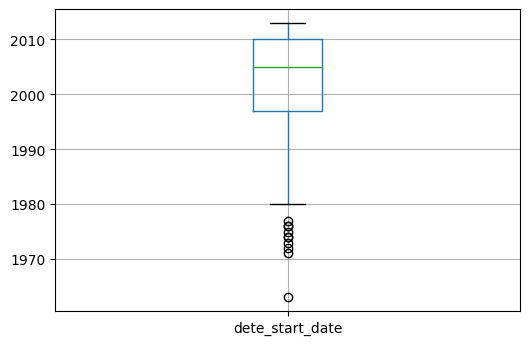

In [24]:
%matplotlib inline
print("Boxplot for dete_start_date\n")
dete_resignations.boxplot(column="dete_start_date");

Boxplot for cease_date from dete_survey dataframe



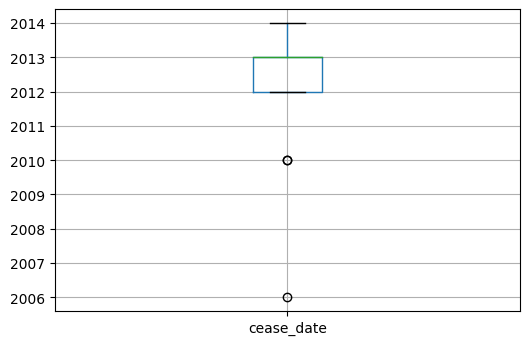

In [25]:
print("Boxplot for cease_date from dete_survey dataframe\n")
dete_resignations.boxplot(column="cease_date");

Boxplot for cease_date from tafe_survey dataframe



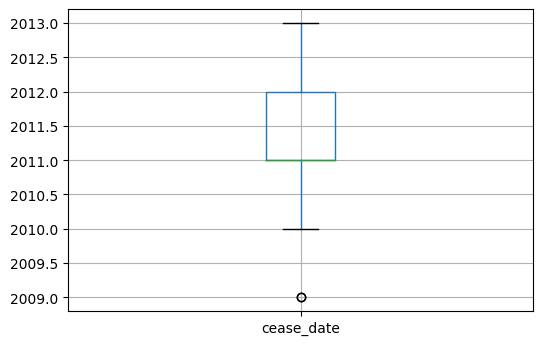

In [26]:
print("Boxplot for cease_date from tafe_survey dataframe\n")
tafe_resignations.boxplot(column="cease_date");

It seems that all ranges of years in the differente columns that we're analyzing are inside a reasonable period of time, considering that the exercise put a threshold of 1940.

## 6. Create a New Column

In [27]:
#Calculate a new column that gives us the time that an employee spent in the institute
dete_resignations["institute_service"]=dete_resignations["cease_date"]-dete_resignations["dete_start_date"]
print("Let's look at the unique values of the new column\n")
print(dete_resignations["institute_service"].value_counts().sort_index(ascending=False))

Let's look at the unique values of the new column

49.0     1
42.0     1
41.0     1
39.0     3
38.0     1
36.0     2
35.0     1
34.0     1
33.0     1
32.0     3
31.0     1
30.0     2
29.0     1
28.0     2
27.0     1
26.0     2
25.0     2
24.0     4
23.0     4
22.0     6
21.0     3
20.0     7
19.0     3
18.0     5
17.0     6
16.0     5
15.0     7
14.0     6
13.0     8
12.0     6
11.0     4
10.0     6
9.0     14
8.0      8
7.0     13
6.0     17
5.0     23
4.0     16
3.0     20
2.0     14
1.0     22
0.0     20
Name: institute_service, dtype: int64


In order to answer the question:

-Why are the employees who worked for a short and long period of time resigning?

We have to create the necessary information, in this case that means to calculate the years of service from both dataframes. For this project the tafe_survey does contain the column, but the dete_survey not, so we calculated it in order to have similar information.

## 7. Identify Dissatisfied Employees


Now it's time to identify any employees who resigned due to dissatisfaction. Below are the columns used to categorize employees as "dissatisfied" from each dataframe:

1.tafe_resignations:
 - Contributing Factors. Dissatisfaction
 - Contributing Factors. Job Dissatisfaction

2.dete_resignations:
 - job_dissatisfaction
 - dissatisfaction_with_the_department
 - physical_work_environment
 - lack_of_recognition
 - lack_of_job_security
 - work_location
 - employment_conditions
 - work_life_balance
 - workload

We'll create a column called dissatisfied in each dataframe where we'll see if the employee indicated any of the factors above caused them to resign. After some changes, the columns dissatisfied will have the following values:

 - True: indicates a person resigned because they were dissatisfied in some way.
 - False: indicates the reason why a person resigned is not dissatisfaction.
 - Nan: indicates the value is missing.

In [28]:
# Dissatisfaction in tafe_resignations
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [29]:
# Job Dissatisfaction in tafe_resignations
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [30]:
# Update values to True. False and NaN
def update_vals(val):
    if pd.isnull(val)==True:
        return np.nan
    elif val=='-':
        return False
    else:
        return True

In [31]:
# Apply the function
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1, skipna=False)
# Check the results
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [32]:
# Dissatisfied column in dete_resignations
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 
                                                     'lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance', 'workload']].any(axis=1, skipna=False)
# Check the results
dete_resignations['dissatisfied'].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

In [33]:
# Create a copy o both dataframes to avoid warning messages
tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up = dete_resignations.copy()

Now we have a column that readily identifies which resignation included dissatisfaction and which didn't (along with the 8 that tells us neither)

## 8. Combine the Data

Now, we're ready to combine the datasets. First of all, we'll add a column to each dataframe that will allow to distinguish between the two. Then we'll combine the dataframes and drop any remaining column we don't need for our analysis.

In [34]:
# New columns
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [35]:
# Combine datasets
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
# Number of non null values in each column
combined

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
0,4.000000e+00,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.000000e+00,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.000000e+00,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.000000e+01,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.200000e+01,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,6.350660e+17,Resignation,2013.0,NaN,NaN,Operational (OO),NaN,NaN,NaN,Temporary Full-time,...,-,-,-,-,-,-,-,-,-,5-6
647,6.350668e+17,Resignation,2013.0,NaN,NaN,Teacher (including LVT),NaN,NaN,NaN,Temporary Full-time,...,-,-,-,-,-,-,-,-,-,1-2
648,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-,-,-,-,-,-,-,-,-,NaN
649,6.350704e+17,Resignation,2013.0,NaN,NaN,Teacher (including LVT),NaN,NaN,NaN,Permanent Full-time,...,-,-,-,-,-,-,-,Other,-,1-2


After the changes above, we have a dataframe which combines the information of the previous dataframes and only contains the columns we are interested in.

## 9. Clean the Service Column

Now that we've combined our dataframes, we're almost at a place where we can perform some kind of analysis! First, though, we'll have to clean up the institute_service column. This column is tricky to clean because it currently contains values in a couple different forms.

To analyze the data, we'll convert these numbers into categories. We'll base our analysis on this article, which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:

 - New: Less than 3 years at a company
 - Experienced: 3-6 years at a company
 - Established: 7-10 years at a company
 - Veteran: 11 or more years at a company

Let's categorize the values in the institute_service column using the definitions above.

In [36]:
# Check unique values in institute_service
combined['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


In [37]:
#use regex (regular expression) pattern r"(\d+)" to select any digit
combined['institute_service'] = (combined['institute_service'].astype('str').str.extract(r"(\d+)").astype('float'))
combined['institute_service'] 

0       7.0
1      18.0
2       3.0
3      15.0
4       3.0
       ... 
646     5.0
647     1.0
648     NaN
649     5.0
650     3.0
Name: institute_service, Length: 651, dtype: float64

In [38]:
def career_stage(val):
    if pd.isnull(val):
        return np.nan
    elif (val < 3):
        return 'New'
    elif (3 <= val < 7):
        return 'Experienced'
    elif (7 <= val < 11):
        return 'Established'
    else:
        return 'Veteran'

In [39]:
#apply the function
combined['service_cat'] = combined['institute_service'].apply(career_stage)
combined['service_cat']

0      Established
1          Veteran
2      Experienced
3          Veteran
4      Experienced
          ...     
646    Experienced
647            New
648            NaN
649    Experienced
650    Experienced
Name: service_cat, Length: 651, dtype: object

In [40]:
combined['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

In [41]:
combined_updated = combined.dropna(axis='columns', thresh=500)
list(combined_updated.columns)

['id',
 'separationtype',
 'cease_date',
 'position',
 'employment_status',
 'gender',
 'age',
 'institute_service',
 'dissatisfied',
 'institute',
 'service_cat']

The institute_service column had a variety of strings and integers representing the length of service. These have all now been sorted into four categories of employees, New, Experienced, Veteran, Established, in the new service_cat column. All other columns with less than 500 non-null values have been removed

## 10. Perform Initial Analysis

In [42]:
combined_updated['dissatisfied'].value_counts().dropna(False)

False    403
True     240
Name: dissatisfied, dtype: int64

In [43]:
# Replace NaN with the most common values
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)
# Check the result
combined_updated['dissatisfied'].value_counts()

<ipython-input-43-e03fcbb815b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)


False    411
True     240
Name: dissatisfied, dtype: int64

In [44]:
#Calculate the percentages of dissatisfied employees in each group of service_cat
dist=combined_updated.pivot_table(values="dissatisfied",index="service_cat")
dist

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


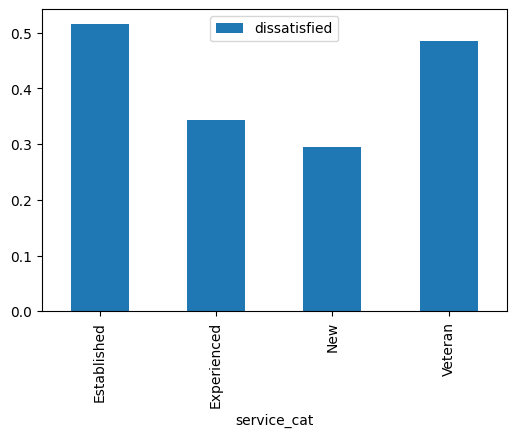

In [45]:
dist.plot(kind="bar");

For this data, 1 represents 100% of the employees who have resigned. As established above, New employees have spent less than 3 years at the company, Experienced employees have 3 to 6 years, Established ones have 7 to 10, and Veteran ones have more than 11 years experience at the company. The barplot shows that of the Established employees who left the job, 45% resigned to job dissatisfaction. New and Experienced employees who resigned were equally likely to give dissatisfaction as the reason (about 27%). Veteran employees were more likely to give dissatisfaction as their resignation reason (37%) than New and Experienced employees, but not as likely as Established ones.

### Removing the rest of the missing values

In [46]:
print(len(combined_updated))
combined_updated.isnull().sum()

651


id                    0
separationtype        0
cease_date           16
position             53
employment_status    54
gender               59
age                  55
institute_service    88
dissatisfied          0
institute             0
service_cat          88
dtype: int64

In [47]:
#drop rows which contain missing values
combined_updated2 = combined_updated.dropna()
combined_updated2

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
0,4.000000e+00,Resignation,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE,Established
1,6.000000e+00,Resignation,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE,Veteran
2,9.000000e+00,Resignation,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE,Experienced
3,1.000000e+01,Resignation,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE,Veteran
4,1.200000e+01,Resignation,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE,Experienced
...,...,...,...,...,...,...,...,...,...,...,...
644,6.350599e+17,Resignation,2013.0,Administration (AO),Temporary Full-time,Female,26 30,1.0,False,TAFE,New
646,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,Male,21 25,5.0,False,TAFE,Experienced
647,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,Male,51-55,1.0,False,TAFE,New
649,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,Female,51-55,5.0,False,TAFE,Experienced


In [48]:
# Cleaning the age column
combined_updated['age'].value_counts()

51-55            71
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
26  30           32
31  35           32
21-25            29
56 or older      29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

As we can see, we have many ranges with age. We decaided to divide all employees on 8 categories:

 - 18 - 25
 - 26 - 30
 - 31 - 35
 - 36 - 40
 - 41 - 45
 - 46 - 50
 - 51 - 55
 - 56 and more

In [49]:
#convering values in age column to float
combined_updated['age'] = (combined_updated['age'].astype(str)
                                                  .str.extract('(\d+)')
                                                .astype(float)
                          )
#see new values after change 
combined_updated['age'].value_counts(dropna=False) #display NaN values also

<ipython-input-49-6b5636e0755f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['age'] = (combined_updated['age'].astype(str)


41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
NaN     55
56.0    55
61.0    23
20.0    10
Name: age, dtype: int64

In [50]:
# Create function to assign each age to range
def set_age(value):
    if value < 25:
        return '18 - 25'
    elif value >= 26 and value <= 30:
        return '26 - 30'
    elif value >= 31 and value <= 35:
        return '31 - 35'
    elif value >= 36 and value <= 40:
        return '36 - 40'
    elif value >= 41 and value <= 45:
        return '41 - 45'
    elif value >= 46 and value <= 50:
        return '46 - 45'
    elif value >= 51 and value <= 55:
        return '51 - 55'
    elif value >= 56:
        return '56 and more'
    elif pd.isnull(value):  #return NaN
        return np.nan    

In [51]:
#create new column and apply each value 
combined_updated['age_range'] = combined_updated['age'].apply(set_age)

#see new values in age_range column after change
combined_updated['age_range'].value_counts(dropna=False).sort_index()

<ipython-input-51-1abf67dfc8ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['age_range'] = combined_updated['age'].apply(set_age)


18 - 25        72
26 - 30        67
31 - 35        61
36 - 40        73
41 - 45        93
46 - 45        81
51 - 55        71
56 and more    78
NaN            55
Name: age_range, dtype: int64

In [52]:
#create pivot table 
pv_age = pd.pivot_table(combined_updated, index='age_range', values='dissatisfied')
pv_age

,dissatisfied
age_range,
18 - 25,0.291667
26 - 30,0.417910
31 - 35,0.377049
36 - 40,0.342466
41 - 45,0.376344
46 - 45,0.382716
51 - 55,0.422535
56 and more,0.423077


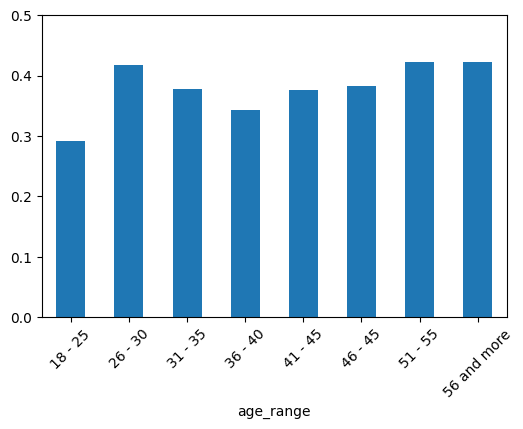

In [53]:
#create plot
pv_age.plot(kind='bar', rot=45, ylim=(0,0.5), legend=False)

As we can noticed, most often employees who left the job due to dissatisfaction are in 3 age ranges:

 - 26 - 30
 - 51 - 55
 - 56 and more
 
Let's create a plot for each group of service to check what is most common age range of dissatisfied employees.

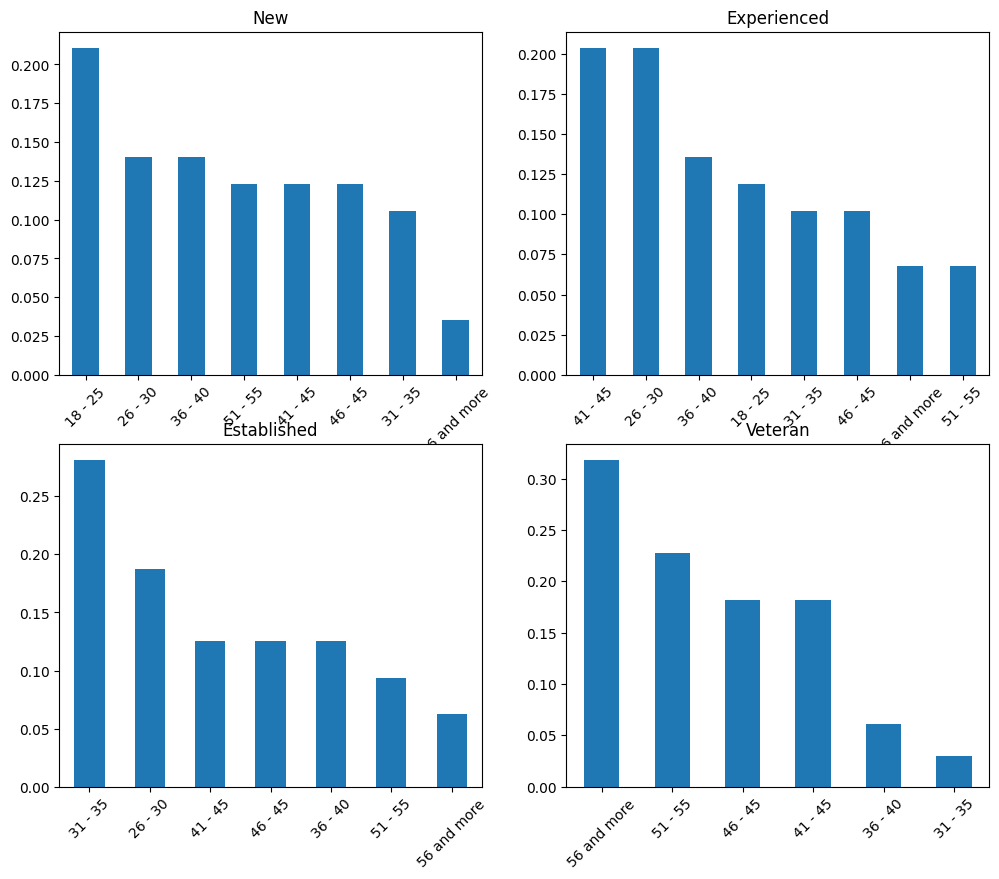

In [54]:
#import matplotlib liblary
import matplotlib.pyplot as plt

#creating plots
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
(combined_updated[(combined_updated['service_cat'] == 'New') & (combined_updated['dissatisfied'] == True)]['age_range'].value_counts(normalize=True)).plot(kind='bar', rot=45)
plt.title('New')

plt.subplot(2,2,2)
(combined_updated[(combined_updated['service_cat'] == 'Experienced') & (combined_updated['dissatisfied'] == True)]['age_range'].value_counts(normalize=True)).plot(kind='bar', rot=45)
plt.title('Experienced')

plt.subplot(2,2,3)
(combined_updated[(combined_updated['service_cat'] == 'Established') & (combined_updated['dissatisfied'] == True)]['age_range'].value_counts(normalize=True)).plot(kind='bar', rot=45)
plt.title('Established')

plt.subplot(2,2,4)
(combined_updated[(combined_updated['service_cat'] == 'Veteran') & (combined_updated['dissatisfied'] == True)]['age_range'].value_counts(normalize=True)).plot(kind='bar', rot=45)
plt.title('Veteran')

plt.show()

We can noticed some observations:

 - In New category every fifth person who left job and was dissatisfied has from 18 till 25 years.
 - 30% all veterans who lef job due to dissatisfaction have more than 56 years.

Let's ask on one more question:

 - Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?

In [55]:
#creat pivot table 
pv_institute = combined_updated.pivot_table(index = 'institute', values = 'dissatisfied')
pv_institute

,dissatisfied
institute,
DETE,0.479100
TAFE,0.267647


# Conclusion

To summarize our analysis, we observe the original questions:

 - Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
 
As we can see, the most employees whose resignaed due to dissatisfaction are from group Established (7-10 years at a company) and Veteran (11 or more years at a company). We can say that every second person who leave job, because they were dissatisfied has 7 years exeprience or more.

 - Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
 
People age 51 or older and age 26-30 were most likely to leave their job due to some sort of dissatisfaction. In each of group, more than 40% employees left the job who are not be satisfied. Whereas, less than 30% of people in age 18-25 leave their job due to dissatisfaction.

Additionally:

 - Employees in DETE survey end their employment almost twice as much as employees from TAFE survey.
 - 30% of veterans who left their job due to dissatisfaction are more than 56 years old.